In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import adfuller, kpss

In [2]:
df = pd.read_csv('/Users/leonardoplacidi/Desktop/BacktestingTrade/Python4Finance/data/Bybit_BTC_1hr_25May_7July2024.csv',
                 index_col=0, usecols=["closePrice", "startTime"])
df.head()

,closePrice
startTime,
2024-05-25 00:00:00,68564.0
2024-05-25 01:00:00,68639.5
2024-05-25 02:00:00,68831.5
2024-05-25 03:00:00,68791.5
2024-05-25 04:00:00,68819.0


In [6]:
def adf_test(x):
    indices = ['Test Statistic', 'p-value',
                '# of Lags Used', '# of Observations Used']
    
    adf_test = adfuller(x, autolag='AIC')
    results = pd.Series(adf_test[0:4], index=indices)
    for key, value in adf_test[4].items():
        results[f'Critical Value ({key})'] = value
    return results

In [7]:
summary = adf_test(df.closePrice)
print(summary)

Test Statistic              0.023305
p-value                     0.960417
# of Lags Used              0.000000
# of Observations Used    999.000000
Critical Value (1%)        -3.436913
Critical Value (5%)        -2.864437
Critical Value (10%)       -2.568313
dtype: float64


## Interpretation:
Test Statistic vs. Critical Values:

The test statistic (0.023305) is much higher than all the critical values at the 1%, 5%, and 10% levels. This indicates that we fail to reject the null hypothesis at any of these significance levels.
p-value:

The p-value (0.960417) is very high, far above the common thresholds of 0.01, 0.05, or 0.10. This high p-value suggests that the null hypothesis cannot be rejected.
Conclusion:
Null Hypothesis: The null hypothesis of the ADF test is that the time series has a unit root (i.e., it is non-stationary).
Alternative Hypothesis: The alternative hypothesis is that the time series does not have a unit root (i.e., it is stationary).

# Understanding Unit Roots and Non-Stationarity

In time series analysis, a series is said to be **stationary** if its statistical properties (mean, variance, autocorrelation, etc.) do not change over time. This means that the series does not have trends, cycles, or other patterns that change over time. A **unit root** in a time series implies that the series is **non-stationary**. Here's why:

## Unit Root Definition

A unit root is a characteristic of a time series that makes it non-stationary. A time series with a unit root can be described by a process where shocks to the series have a permanent effect.

## Mathematical Representation

Consider a simple autoregressive process of order 1, AR(1):

$$ y_t = \rho y_{t-1} + \epsilon_t $$

where $ \epsilon_t $ is a white noise error term with mean zero and constant variance.

- If $ |\rho| < 1 $, the series is stationary because shocks to the system dissipate over time.
- If $ \rho = 1 $, the series has a unit root and can be written as:

$$ y_t = y_{t-1} + \epsilon_t $$

This implies that changes in $ y_t $ are purely driven by the error term $ \epsilon_t $, and the impact of a shock $ \epsilon_t $ does not dissipate over time but instead accumulates.

## Characteristics of a Series with a Unit Root

- **Permanent Shocks**: A series with a unit root does not revert to a long-term mean. Any shock to the system has a permanent effect, leading to a random walk behavior.
- **Infinite Variance**: Over time, the variance of the series increases without bound, as each new shock adds to the variance.
- **Lack of Mean Reversion**: There is no tendency for the series to return to a long-term mean value, unlike stationary series which oscillate around a constant mean.


# KPSS test

The KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test is a statistical test used to check for stationarity in a time series. Unlike the ADF test, where the null hypothesis assumes a unit root (non-stationarity), the null hypothesis of the KPSS test assumes that the series is stationary around a deterministic trend. The alternative hypothesis suggests that the series is non-stationary due to a unit root. This test is useful as it complements the ADF test, allowing for a more robust analysis of the time series by testing stationarity from both perspectives.

In [8]:
def kpss_test(x, h0_type='c'):
    indices = ['Test Statistic', 'p-value', '# of Lags']

    kpss_test = kpss(x, regression=h0_type) 

    results = pd.Series(kpss_test[0:3], index=indices)
    for key, value in kpss_test[3].items():

        results[f'Critical Value ({key})'] = value 
    return results

In [9]:
kpss_test(df.closePrice)

/var/folders/97/gnjvmb3x0_s4v_gfyqxc1zdm0000gn/T/ipykernel_85476/2117650436.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(x, regression=h0_type)


Test Statistic            4.281302
p-value                   0.010000
# of Lags                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

Given that the test statistic is much higher than the critical values and the p-value is very low, we reject the null hypothesis at the 1% significance level (and also at the 2.5%, 5%, and 10% levels).

Therefore, you can conclude that there is strong evidence to suggest that the time series is non-stationary. This complements the result from the ADF test, reinforcing the conclusion that the series is non-stationary.

# ACF/PACF plots
ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are tools used in time series analysis to identify the nature of the series and to help in the selection of appropriate models for forecasting. They are particularly useful in identifying the order of autoregressive (AR) and moving average (MA) terms in ARIMA models.


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

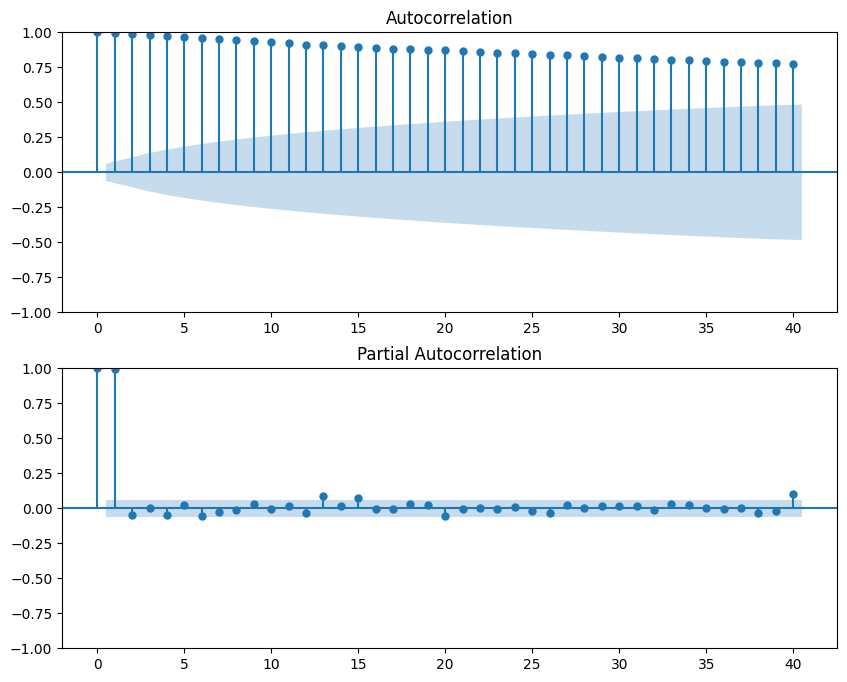

In [17]:
N_LAGS = 40 
SIGNIFICANCE_LEVEL = 0.05

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df.closePrice, ax=ax[0], lags=N_LAGS,
 alpha=SIGNIFICANCE_LEVEL)
plot_pacf(df.closePrice, ax=ax[1], lags=N_LAGS,
 alpha=SIGNIFICANCE_LEVEL)

# Prevent Jupyter from displaying the figure twice
plt.show()

The slow decay in the ACF plot indicates that the time series is likely non-stationary. This conclusion is consistent with the result from the ADF and KPSS tests previously discussed.
The ACF and PACF plots suggest that the time series is non-stationary and may be well-represented by an AR(1) model after differencing.

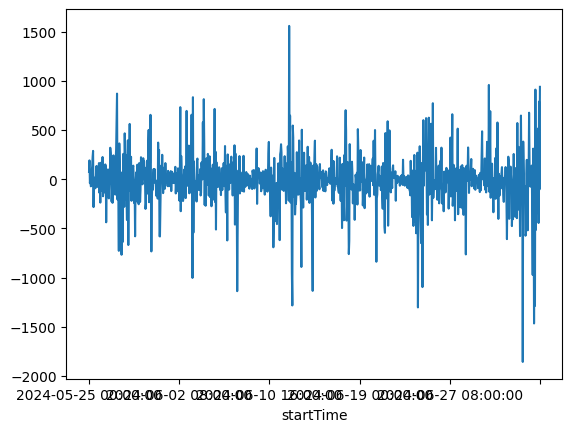

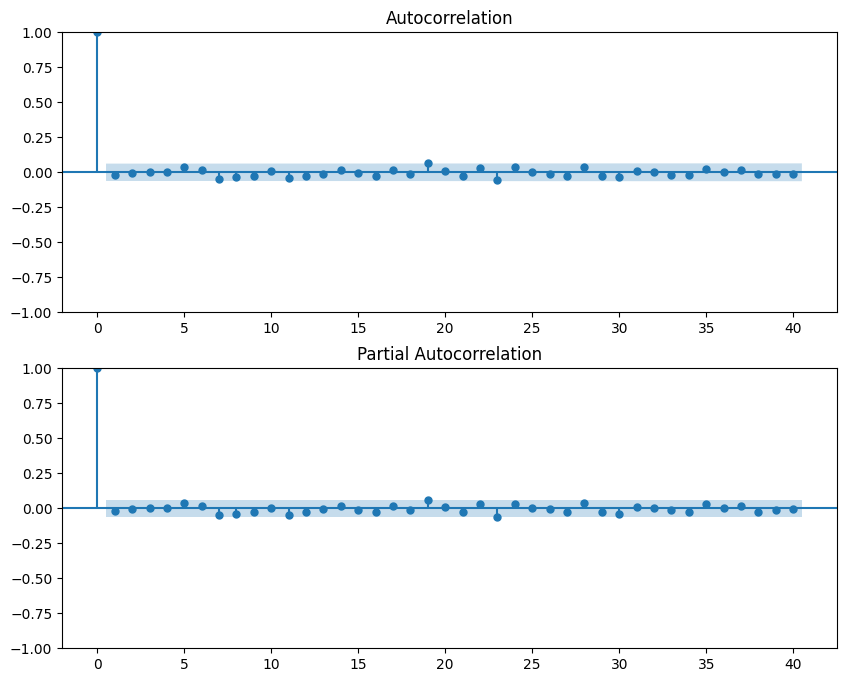

In [18]:
import pandas as pd

# Assuming df is your DataFrame and 'closePrice' is your time series column
df['differenced'] = df['closePrice'].diff().dropna()

# Plot the differenced series to check for stationarity
df['differenced'].plot()
plt.show()

# Re-evaluate ACF and PACF plots on the differenced series
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df['differenced'].dropna(), ax=ax[0], lags=40)
plot_pacf(df['differenced'].dropna(), ax=ax[1], lags=40)
plt.show()


Now the series is basically stationary and one could use an ARIMA model.

In [23]:
df.head()

,closePrice,differenced
startTime,,
2024-05-25 00:00:00,68564.0,NaN
2024-05-25 01:00:00,68639.5,75.5
2024-05-25 02:00:00,68831.5,192.0
2024-05-25 03:00:00,68791.5,-40.0
2024-05-25 04:00:00,68819.0,27.5


In [24]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size= 0.3, shuffle=False)

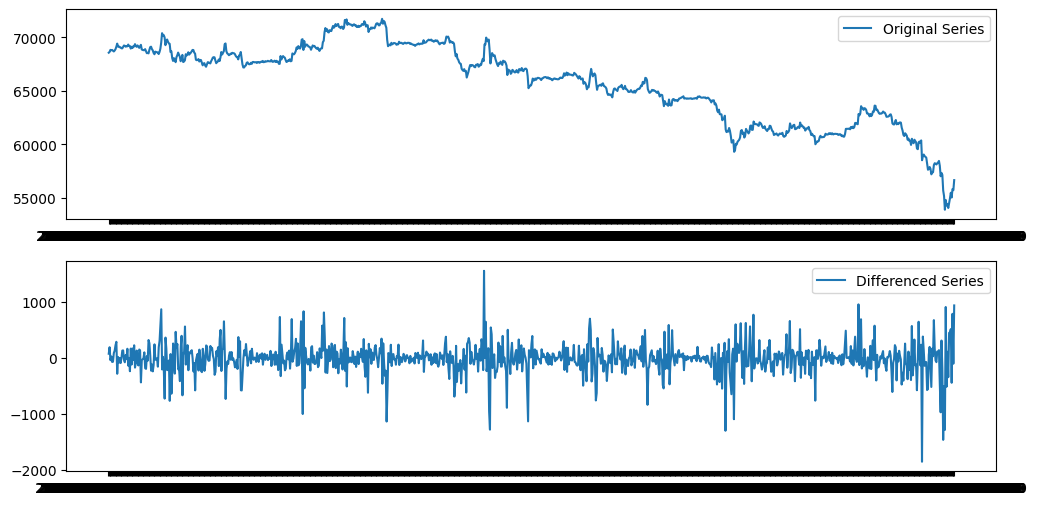

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df['closePrice'], label='Original Series')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['differenced'], label='Differenced Series')
plt.legend()
plt.show()


/Users/leonardoplacidi/opt/anaconda3/envs/BT/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/leonardoplacidi/opt/anaconda3/envs/BT/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/leonardoplacidi/opt/anaconda3/envs/BT/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             closePrice   No. Observations:                  700
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4845.211
Date:                Sun, 07 Jul 2024   AIC                           9694.421
Time:                        17:26:26   BIC                           9703.520
Sample:                    05-25-2024   HQIC                          9697.939
                         - 06-23-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0167      0.024      0.702      0.483      -0.030       0.063
sigma2       6.15e+04   1697.875     36.223      0.000    5.82e+04    6.48e+04
Ljung-Box (L1) (Q):                   0.00   Jarque-

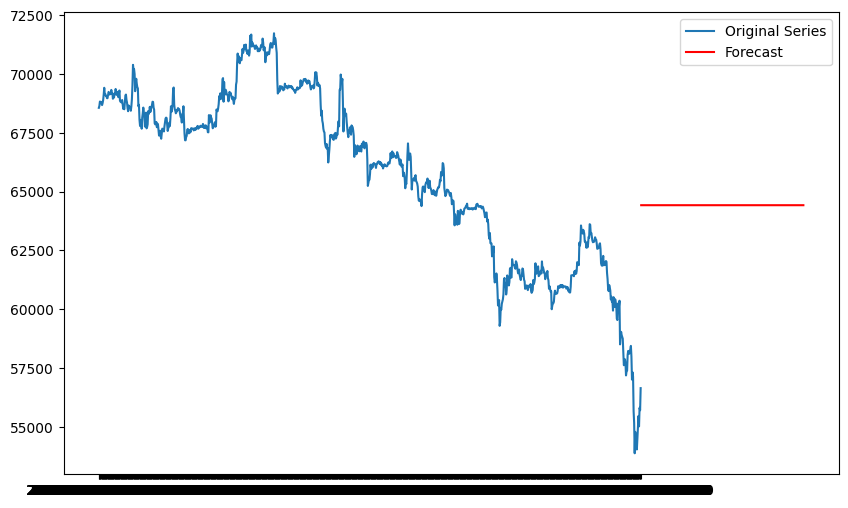

In [26]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'closePrice' is your time series column

# Fit the ARIMA model
model = ARIMA(df_train['closePrice'], order=(1, 1, 0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast the next steps (e.g., next 10 steps)
forecast_steps = len(df_test)
forecast = model_fit.forecast(steps=forecast_steps)
print(forecast)

# Plot the original series and the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['closePrice'], label='Original Series')
plt.plot(range(len(df), len(df) + forecast_steps), forecast, label='Forecast', color='red')
plt.legend()
plt.show()


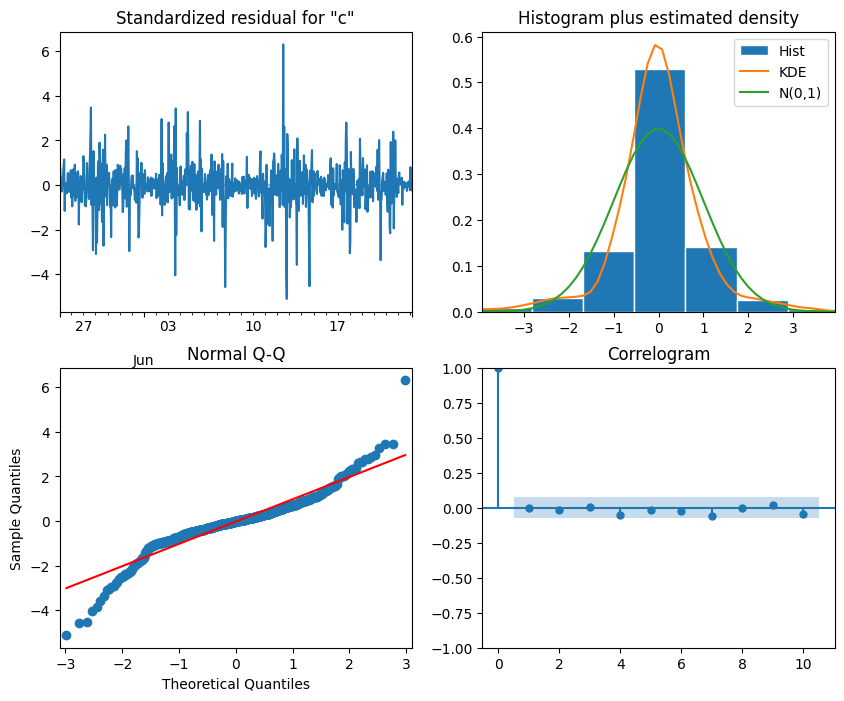

In [27]:
model_fit.plot_diagnostics(figsize=(10, 8))
plt.show()


/Users/leonardoplacidi/opt/anaconda3/envs/BT/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/leonardoplacidi/opt/anaconda3/envs/BT/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/leonardoplacidi/opt/anaconda3/envs/BT/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Order: (1, 1, 0)
                               SARIMAX Results                                
Dep. Variable:             closePrice   No. Observations:                  700
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4845.211
Date:                Sun, 07 Jul 2024   AIC                           9694.421
Time:                        17:30:31   BIC                           9703.520
Sample:                    05-25-2024   HQIC                          9697.939
                         - 06-23-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0167      0.024      0.702      0.483      -0.030       0.063
sigma2       6.15e+04   1697.875     36.223      0.000    5.82e+04    6.48e+04
Ljung-Box (L1) (Q):                

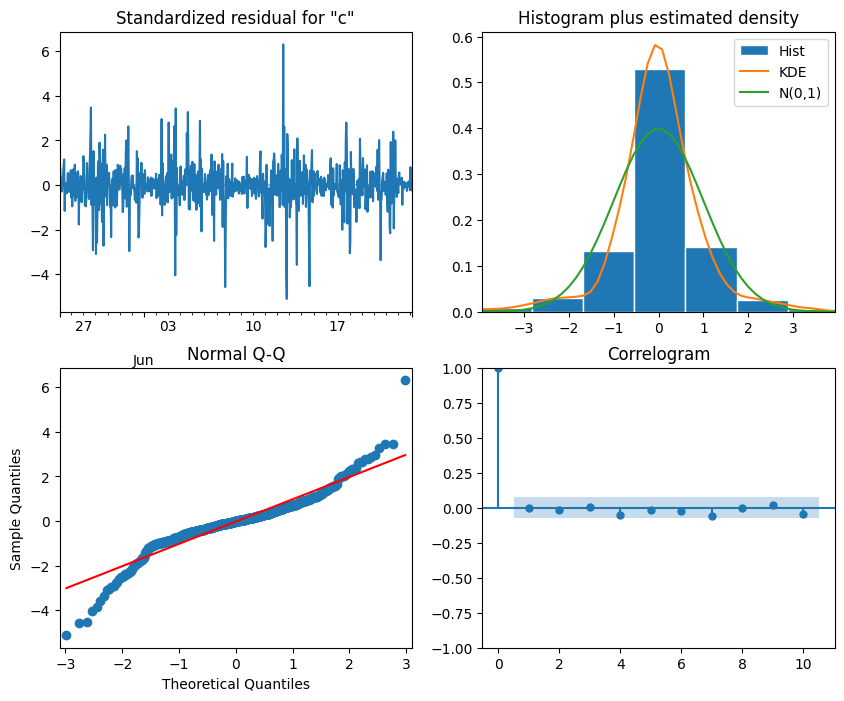

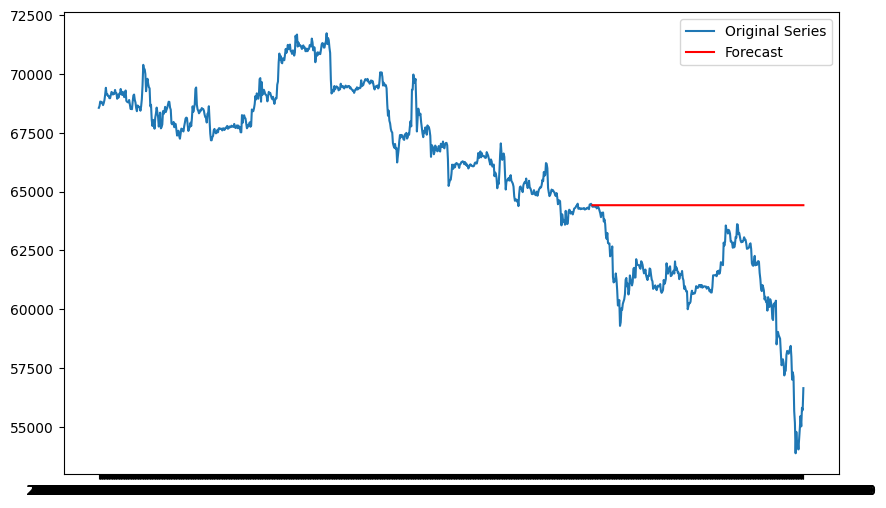

/Users/leonardoplacidi/opt/anaconda3/envs/BT/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/leonardoplacidi/opt/anaconda3/envs/BT/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/leonardoplacidi/opt/anaconda3/envs/BT/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Order: (1, 1, 1)
                               SARIMAX Results                                
Dep. Variable:             closePrice   No. Observations:                  700
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4845.167
Date:                Sun, 07 Jul 2024   AIC                           9696.334
Time:                        17:30:34   BIC                           9709.983
Sample:                    05-25-2024   HQIC                          9701.610
                         - 06-23-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6471      0.723     -0.895      0.371      -2.065       0.771
ma.L1          0.6621      0.718      0.922      0.356      -0.745       2.069
sigma2      6.165e+04   1698.489   

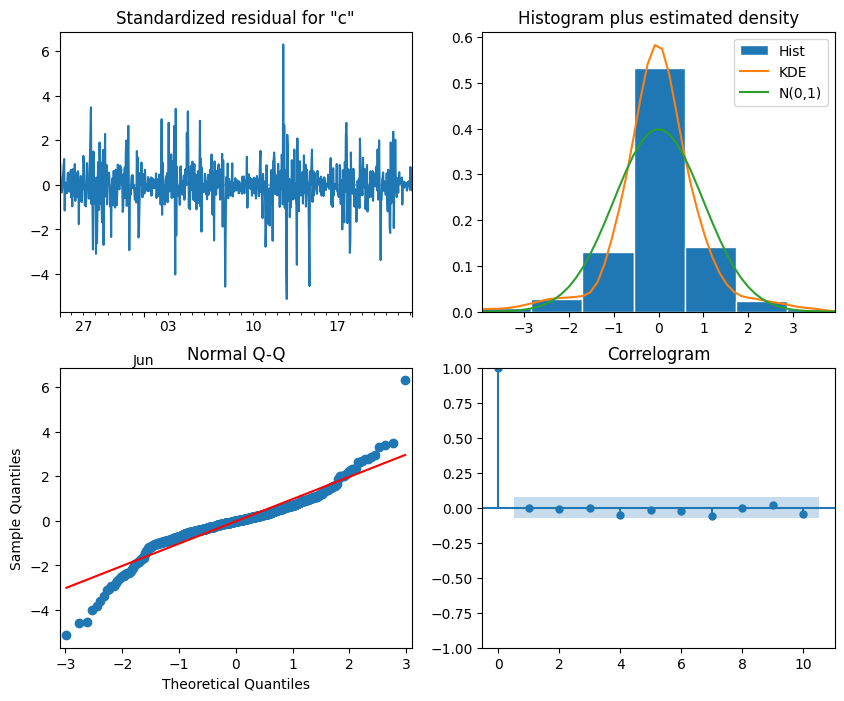

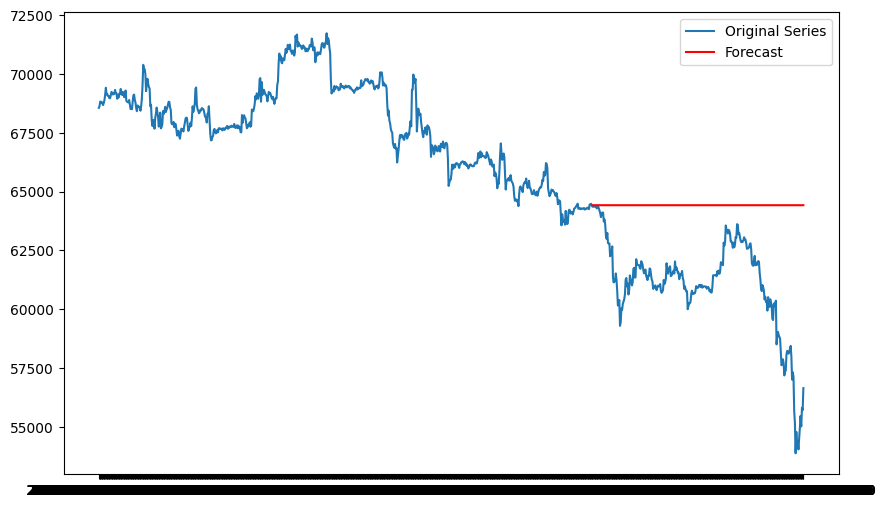

/Users/leonardoplacidi/opt/anaconda3/envs/BT/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/leonardoplacidi/opt/anaconda3/envs/BT/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/leonardoplacidi/opt/anaconda3/envs/BT/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Order: (2, 1, 0)
                               SARIMAX Results                                
Dep. Variable:             closePrice   No. Observations:                  700
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -4845.211
Date:                Sun, 07 Jul 2024   AIC                           9696.421
Time:                        17:30:38   BIC                           9710.070
Sample:                    05-25-2024   HQIC                          9701.698
                         - 06-23-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0167      0.024      0.701      0.484      -0.030       0.063
ar.L2          0.0005      0.027      0.018      0.985      -0.052       0.053
sigma2      6.152e+04   1709.308   

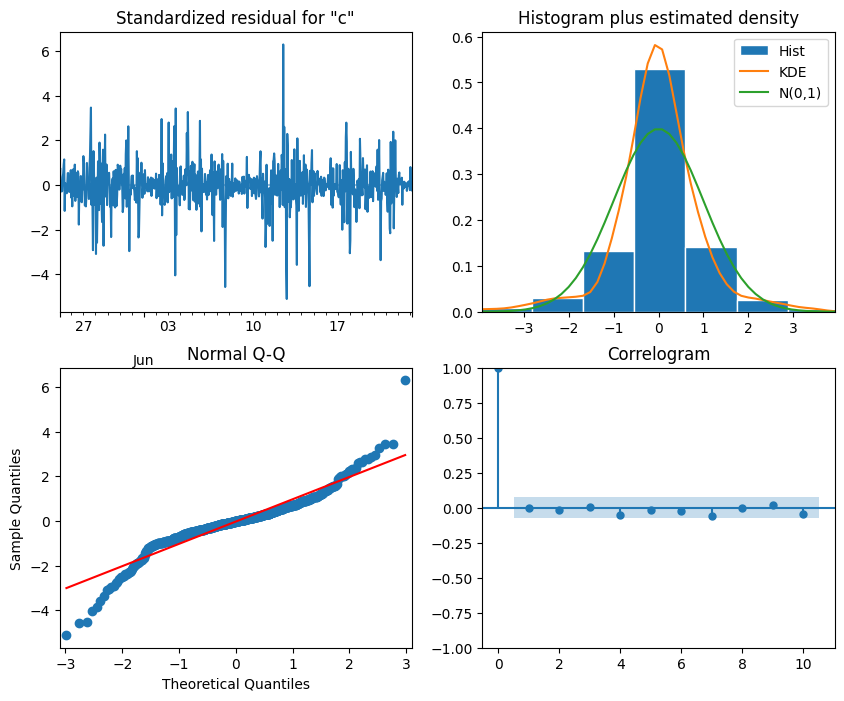

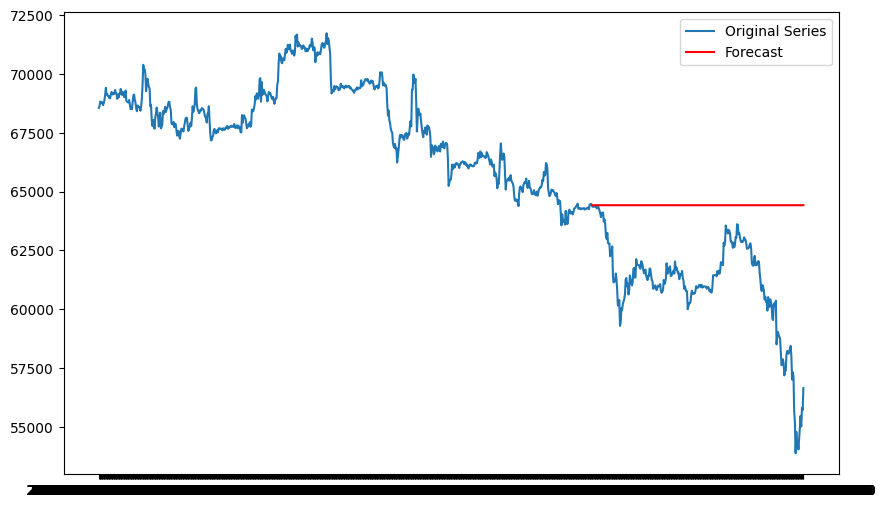

/Users/leonardoplacidi/opt/anaconda3/envs/BT/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/leonardoplacidi/opt/anaconda3/envs/BT/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/leonardoplacidi/opt/anaconda3/envs/BT/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Order: (2, 1, 1)
                               SARIMAX Results                                
Dep. Variable:             closePrice   No. Observations:                  700
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -4845.193
Date:                Sun, 07 Jul 2024   AIC                           9698.387
Time:                        17:30:41   BIC                           9716.585
Sample:                    05-25-2024   HQIC                          9705.422
                         - 06-23-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4299      3.683     -0.117      0.907      -7.649       6.789
ar.L2          0.0016      0.075      0.022      0.983      -0.145       0.148
ma.L1          0.4468      3.689   

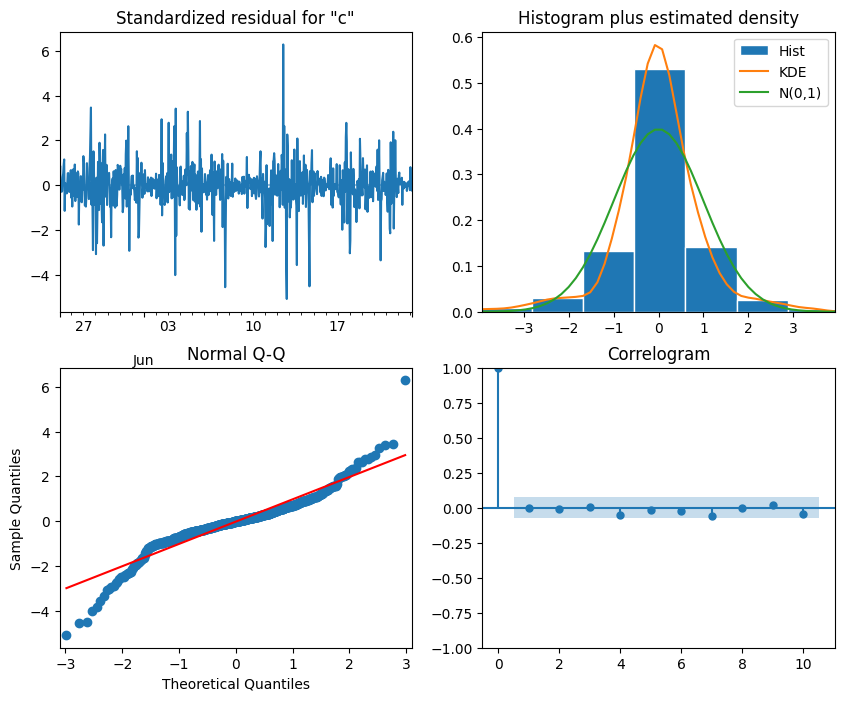

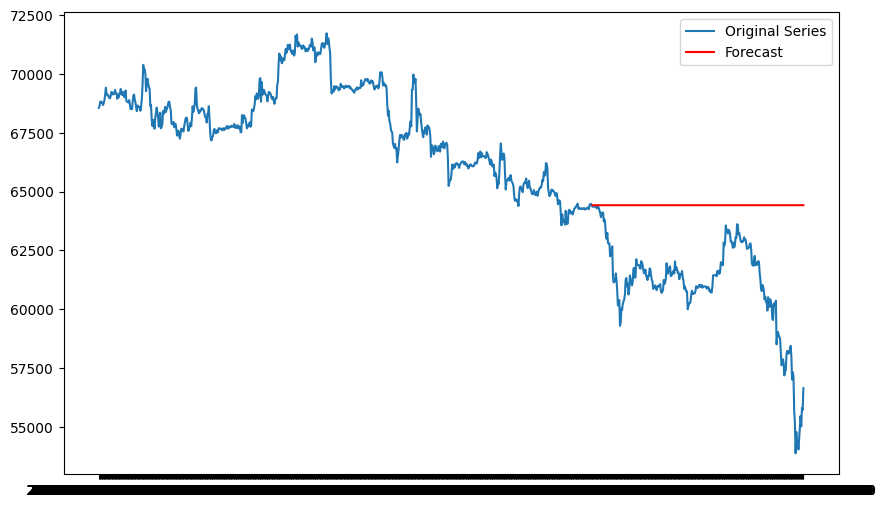

In [28]:
# Fit ARIMA model with different orders and compare
orders = [(1, 1, 0), (1, 1, 1), (2, 1, 0), (2, 1, 1)]
for order in orders:
    model = ARIMA(df_train['closePrice'], order=order)
    model_fit = model.fit()
    print(f'Order: {order}')
    print(model_fit.summary())
    model_fit.plot_diagnostics(figsize=(10, 8))
    plt.show()

    # Forecast the next steps (e.g., next 10 steps)
    forecast_steps = len(df_test)
    forecast = model_fit.forecast(steps=forecast_steps)
    forecast = pd.Series(forecast, index=df_test.index)

    # Plot the original series and the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(df['closePrice'], label='Original Series')
    plt.plot(forecast, label='Forecast', color='red')
    plt.legend()
    plt.show()

So the ARIMA model here sucks.